### Read Dataset

In [3]:
import pandas as pd
df = pd.read_csv('House_price/vietnam_housing_dataset.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30229 entries, 0 to 30228
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Address            30229 non-null  object 
 1   Area               30229 non-null  float64
 2   Frontage           18665 non-null  float64
 3   Access Road        16932 non-null  float64
 4   House direction    8990 non-null   object 
 5   Balcony direction  5246 non-null   object 
 6   Floors             26626 non-null  float64
 7   Bedrooms           25067 non-null  float64
 8   Bathrooms          23155 non-null  float64
 9   Legal status       25723 non-null  object 
 10  Furniture state    16110 non-null  object 
 11  Price              30229 non-null  float64
dtypes: float64(7), object(5)
memory usage: 2.8+ MB


In [5]:
df.head(5)

,Address,Area,Frontage,Access Road,House direction,Balcony direction,Floors,Bedrooms,Bathrooms,Legal status,Furniture state,Price
0,"Dự án The Empire - Vinhomes Ocean Park 2, Xã L...",84.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,Have certificate,NaN,8.60
1,"Dự án The Crown - Vinhomes Ocean Park 3, Xã Ng...",60.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,7.50
2,"Dự án The Crown - Vinhomes Ocean Park 3, Xã Ng...",90.0,6.0,13.0,Đông - Bắc,Đông - Bắc,5.0,NaN,NaN,Sale contract,NaN,8.90
3,"Đường Nguyễn Văn Khối, Phường 11, Gò Vấp, Hồ C...",54.0,NaN,3.5,Tây - Nam,Tây - Nam,2.0,2.0,3.0,Have certificate,Full,5.35
4,"Đường Quang Trung, Phường 8, Gò Vấp, Hồ Chí Minh",92.0,NaN,NaN,Đông - Nam,Đông - Nam,2.0,4.0,4.0,Have certificate,Full,6.90


In [1]:
df.isnull().sum()

NameError: name 'df' is not defined

In [7]:
Percentage_null = df.isnull().sum()/len(df) * 100
Percentage_null


Address               0.000000
Area                  0.000000
Frontage             38.254656
Access Road          43.987562
House direction      70.260346
Balcony direction    82.645804
Floors               11.919018
Bedrooms             17.076317
Bathrooms            23.401370
Legal status         14.906216
Furniture state      46.706805
Price                 0.000000
dtype: float64

In [8]:
df['Address'].value_counts()

Address
Dự án The Empire - Vinhomes Ocean Park 2, Xã Long Hưng, Văn Giang, Hưng Yên    187
Dự án The Crown - Vinhomes Ocean Park 3, Xã Nghĩa Trụ, Văn Giang, Hưng Yên     129
Đường Trương Định, Phường Trương Định, Hai Bà Trưng, Hà Nội                     84
Đường Ngọc Thụy, Phường Ngọc Thụy, Long Biên, Hà Nội                            77
Đường Minh Khai, Phường Minh Khai, Hai Bà Trưng, Hà Nội                         74
                                                                              ... 
Đường Trần Cao Vân, Phường Trường Xuân, Tam Kỳ, Quảng Nam                        1
Đường Nước Mặn 3, Phường  Khuê Mỹ, Ngũ Hành Sơn, Đà Nẵng                         1
Đường 1, Phường Long Bình, Biên Hòa, Đồng Nai                                    1
Đường Khương Đình, Phường Khương Trung, Thanh Xuân, Hà Nội                       1
Đường Số 8, Phường An Bình, Ninh Kiều, Cần Thơ                                   1
Name: count, Length: 10265, dtype: int64

### Data Cleaning

In [9]:
print("Số lượng giá trị thiếu TRƯỚC KHI xử lý:")
print(df[['Frontage', 'Access Road']].isnull().sum())

fill_with_mode = lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x

df['Frontage'] = df.groupby('Address')['Frontage'].transform(fill_with_mode)
df['Access Road'] = df.groupby('Address')['Access Road'].transform(fill_with_mode)

print("\nSố lượng giá trị thiếu SAU KHI xử lý:")
print(df[['Frontage', 'Access Road']].isnull().sum())

Số lượng giá trị thiếu TRƯỚC KHI xử lý:
Frontage       11564
Access Road    13297
dtype: int64

Số lượng giá trị thiếu SAU KHI xử lý:
Frontage       2955
Access Road    3680
dtype: int64


In [10]:
Percentage_null

Address               0.000000
Area                  0.000000
Frontage             38.254656
Access Road          43.987562
House direction      70.260346
Balcony direction    82.645804
Floors               11.919018
Bedrooms             17.076317
Bathrooms            23.401370
Legal status         14.906216
Furniture state      46.706805
Price                 0.000000
dtype: float64

In [11]:
df['House direction'].isnull().sum()

21239

In [12]:
df["Balcony direction"].isnull().sum()

24983

In [13]:
df['House direction'].fillna("Null", inplace=True)
df['Balcony direction'].fillna("Null", inplace=True)

C:\Users\ADmin\AppData\Local\Temp\ipykernel_22076\200242105.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['House direction'].fillna("Null", inplace=True)
C:\Users\ADmin\AppData\Local\Temp\ipykernel_22076\200242105.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [14]:
df['House direction'].isnull().sum()


0

In [15]:
df['Floors'].isnull().sum()

3603

In [16]:
df['Floors'].value_counts()


Floors
4.0     6221
3.0     6153
5.0     5717
2.0     5715
1.0     1920
6.0      780
7.0      115
8.0        3
10.0       1
9.0        1
Name: count, dtype: int64

In [17]:
df['floor'] = df.groupby('Address')['Floors'].transform(fill_with_mode)

In [18]:
df['floor'].isnull().sum()

1261

In [19]:
df['Floors'].fillna(1, inplace=True)

C:\Users\ADmin\AppData\Local\Temp\ipykernel_22076\2613566152.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Floors'].fillna(1, inplace=True)


In [20]:
df['Bathrooms'].isnull().sum()

7074

In [21]:
df['Bedrooms'].isnull().sum()


5162

In [22]:
# Loại bỏ chuyển đổi 'Area' sang dạng phân loại để giữ nguyên kiểu số
# import numpy as np
# area_bins = [0,40,70,150,np.inf]
# area_labels = ['Under 40m', '40-70m', '70-150m', 'Over 150m']
# df['Area'] = pd.cut(df['Area'], bins=area_bins, labels=area_labels)


In [23]:
df['Area']

0        84.0
1        60.0
2        90.0
3        54.0
4        92.0
         ... 
30224    67.0
30225    30.0
30226    69.4
30227    96.0
30228    35.0
Name: Area, Length: 30229, dtype: float64

In [24]:
fill_with_median = lambda x: x.fillna(x.median())

df['Bedrooms'] = df.groupby(['Address', 'Area'])['Bedrooms'].transform(fill_with_median)
df['Bedrooms'] = df.groupby(['Address'])['Bedrooms'].transform(fill_with_median)

df['Bathrooms'] = df.groupby(['Address', 'Area'])['Bathrooms'].transform(fill_with_median)
df['Bathrooms'] = df.groupby(['Address'])['Bathrooms'].transform(fill_with_median)

d:\DA\DataMining\.venv\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
d:\DA\DataMining\.venv\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
d:\DA\DataMining\.venv\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
d:\DA\DataMining\.venv\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
d:\DA\DataMining\.venv\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
d:\DA\DataMining\.venv\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
d:\D

In [25]:
df['Bedrooms'].isnull().sum()


1454

In [26]:
df['Bedrooms'].fillna(1, inplace=True)

C:\Users\ADmin\AppData\Local\Temp\ipykernel_22076\2199557242.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Bedrooms'].fillna(1, inplace=True)


In [27]:
df['Bathrooms'].isnull().sum()




1845

In [28]:
df['Bathrooms'].fillna(1, inplace=True)


C:\Users\ADmin\AppData\Local\Temp\ipykernel_22076\1840766272.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Bathrooms'].fillna(1, inplace=True)


In [29]:
df['Legal status'].isnull().sum()

4506

In [30]:
df['Legal status'].value_counts()

Legal status
Have certificate    24774
Sale contract         949
Name: count, dtype: int64

In [31]:
df['Legal status'].fillna('Sale contract', inplace=True)


C:\Users\ADmin\AppData\Local\Temp\ipykernel_22076\1175686329.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Legal status'].fillna('Sale contract', inplace=True)


In [32]:
df['Furniture state'].value_counts()

Furniture state
Full     10591
Basic     5519
Name: count, dtype: int64

In [33]:
df['Furniture state'].isnull().sum()

14119

In [34]:
df['Furniture state'].fillna('Unfurnished', inplace=True)

C:\Users\ADmin\AppData\Local\Temp\ipykernel_22076\1732081185.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Furniture state'].fillna('Unfurnished', inplace=True)


In [35]:
df['Furniture state'].value_counts()

Furniture state
Unfurnished    14119
Full           10591
Basic           5519
Name: count, dtype: int64

In [36]:
Percentage_after_cleaning = df.isnull().sum()/len(df) * 100
Percentage_after_cleaning

Address               0.000000
Area                  0.000000
Frontage              9.775381
Access Road          12.173740
House direction       0.000000
Balcony direction     0.000000
Floors                0.000000
Bedrooms              0.000000
Bathrooms             0.000000
Legal status          0.000000
Furniture state       0.000000
Price                 0.000000
floor                 4.171491
dtype: float64

## Save Dataset

In [35]:
# saving the dataframe
df.to_csv(r'Complete_dataset/Complete_dataset_VietNam_house_pricing.csv')

## Machine Learning

## Plan : 

- LinearRegression → baseline, dễ hiểu, giải thích được.
- HistGradientBoostingRegressor (HGBR) → phiên bản tối ưu hơn GradientBoosting trong sklearn, chạy nhanh và hiệu quả trên dữ liệu lớn.
- LGBMRegressor → mạnh mẽ, thường outperform HGBR trong nhiều bài toán tabular.
- ====================================
- Linear Regression, Ridge (baseline hồi quy)
- Random Forest, GradientBoosting, LGBM, HistGradientBoosting (cây mạnh)
- MLPRegressor hoặc SVR (đại diện nhóm khác)

Ý nghĩa các cột trong bảng:

Model: Tên thuật toán.

Adjusted R-Squared, R-Squared: Độ đo chất lượng fit (càng cao càng tốt, gần 1).

RMSE: Sai số trung bình căn bậc 2 (càng thấp càng tốt).

Time Taken: Thời gian huấn luyện (giây).

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from lazypredict.Supervised import LazyRegressor

In [38]:
num_features = ['Area', 'Frontage', 'Access Road', 'Floors', 'Bedrooms', 'Bathrooms']
cat_features = ['House direction', 'Balcony direction', 'Legal status', 'Furniture state']



feature_cols = num_features + cat_features

In [39]:
X = df[feature_cols]
y = df['Price']

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# cái khúc này dùng để chuẩn hóa

num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Thay thế giá trị thiếu bằng giá trị trung vị
    ('scaler', StandardScaler()) 
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Thay thế giá trị thiếu bằng giá trị thường gặp
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
])

preprocessor.fit(X_train)

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [42]:
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [43]:
feature_names = preprocessor.get_feature_names_out()

In [44]:
# Sửa lỗi: numpy.ndarray không có phương thức toarray()
X_train_processed = pd.DataFrame(X_train_processed, columns=feature_names, index=X_train.index)
X_test_processed = pd.DataFrame(X_test_processed, columns=feature_names, index=X_test.index)

In [45]:
from lazypredict.Supervised import LazyRegressor 
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.neural_network import MLPRegressor


custom_classes = [
    LinearRegression,
    Ridge, # Không có dấu ngoặc đơn ()
    Lasso, # Không có dấu ngoặc đơn ()
    DecisionTreeRegressor, 
    RandomForestRegressor, 
    GradientBoostingRegressor,
    HistGradientBoostingRegressor,
    MLPRegressor
]

# Thử truyền danh sách các lớp này
reg = LazyRegressor(regressors=custom_classes, ignore_warnings=False) 
models, predictions = reg.fit(X_train_processed, X_test_processed, y_train, y_test)

  0%|          | 0/8 [00:00<?, ?it/s]

In [46]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HistGradientBoostingRegressor,0.36,0.37,1.76,2.84
RandomForestRegressor,0.35,0.35,1.77,8.21
GradientBoostingRegressor,0.32,0.33,1.81,1.80
MLPRegressor,0.29,0.29,1.85,19.86
LinearRegression,0.19,0.20,1.98,0.07
Ridge,0.19,0.20,1.98,0.05
Lasso,-0.00,-0.00,2.21,0.05
DecisionTreeRegressor,-0.23,-0.23,2.44,0.15


In [47]:
from lazypredict.Supervised import LazyRegressor 
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression


# custom_classes = [
#     LinearRegression,
#     Ridge, # Không có dấu ngoặc đơn ()
#     Lasso, # Không có dấu ngoặc đơn ()
#     DecisionTreeRegressor, 
#     RandomForestRegressor, 
#     GradientBoostingRegressor
# ]

# Thử truyền danh sách các lớp này
reg = LazyRegressor() # Tắt ignore_warnings để xem thêm chi tiết nếu lỗi
models, predictions = reg.fit(X_train_processed, X_test_processed, y_train, y_test)

  0%|          | 0/42 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [48]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HistGradientBoostingRegressor,0.36,0.37,1.76,2.84
RandomForestRegressor,0.35,0.35,1.77,8.21
GradientBoostingRegressor,0.32,0.33,1.81,1.80
MLPRegressor,0.29,0.29,1.85,19.86
LinearRegression,0.19,0.20,1.98,0.07
Ridge,0.19,0.20,1.98,0.05
Lasso,-0.00,-0.00,2.21,0.05
DecisionTreeRegressor,-0.23,-0.23,2.44,0.15


In [49]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_processed, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [50]:
y_pred = model.predict(X_test_processed)


In [51]:
#để đánh giá mô hình

from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE: {mae:.2f} Tỷ VNĐ")
print(f"RMSE: {rmse:.2f} Tỷ VNĐ")

MAE: 1.61 Tỷ VNĐ
RMSE: 1.98 Tỷ VNĐ


In [52]:
def test_house_price(
    Area,
    Frontage,
    Access_Road,
    Floors,
    Bedrooms,
    Bathrooms,
    House_direction,
    Balcony_direction,
    Legal_status,
    Furniture_state,
    Address=None,
    preprocessor=None,
    model=None
):
    """
    Dự đoán giá nhà dựa trên thông tin đầu vào.
    Các tham số đều là giá trị của từng cột trong dataset.
    preprocessor: bộ xử lý dữ liệu đã fit
    model: mô hình đã huấn luyện
    """
    import pandas as pd

    input_dict = {
        'Area': Area,
        'Frontage': Frontage,
        'Access Road': Access_Road,
        'Floors': Floors,
        'Bedrooms': Bedrooms,
        'Bathrooms': Bathrooms,
        'House direction': House_direction,
        'Balcony direction': Balcony_direction,
        'Legal status': Legal_status,
        'Furniture state': Furniture_state
    }

    # Nếu có các trường bổ sung, thêm vào dict
    if Address is not None:
        input_dict['Address'] = Address

    # Tạo DataFrame từ input
    df_input = pd.DataFrame([input_dict])

    # Xử lý dữ liệu đầu vào
    X_processed = preprocessor.transform(df_input)

    # Dự đoán giá
    predicted_price = model.predict(X_processed)
    return predicted_price[0]


In [53]:
pred = test_house_price(
    Area=46,
    Frontage=6,
    Access_Road=13,
    Floors=4,
    Bedrooms=4,
    Bathrooms=5,
    House_direction="Đông - Nam",
    Balcony_direction="Đông - Nam",
    Legal_status="Have certificate",
    Furniture_state="Full",
    Address="Đường Quang Trung, Phường 12, Gò Vấp, Hồ Chí Minh",
    preprocessor=preprocessor,
    model=model
)

print(f"Giá dự đoán: {pred:.2f} Tỷ VNĐ")


Giá dự đoán: 6.56 Tỷ VNĐ


In [54]:
pred = test_house_price(
    Frontage=None,  
    Access_Road=None, 
    House_direction="Tây - Bắc",
    Balcony_direction=None,  
    Legal_status="Sale contract",
    Furniture_state=None, 
    Address="Dự án The Empire - Vinhomes Ocean Park 2, Hưng Yên",
    Area=96,
    Floors=4,
    Bedrooms=None,
    Bathrooms=None,
    preprocessor=preprocessor,
    model=model
)

print(f"Giá dự đoán: {pred:.2f} Tỷ VNĐ")


Giá dự đoán: 5.64 Tỷ VNĐ


In [55]:
df.head(100)

,Address,Area,Frontage,Access Road,House direction,Balcony direction,Floors,Bedrooms,Bathrooms,Legal status,Furniture state,Price,floor
0,"Dự án The Empire - Vinhomes Ocean Park 2, Xã L...",84.00,5.00,13.00,Null,Null,4.00,6.00,5.00,Have certificate,Unfurnished,8.60,4.00
1,"Dự án The Crown - Vinhomes Ocean Park 3, Xã Ng...",60.00,6.00,13.00,Null,Null,5.00,6.00,4.00,Sale contract,Unfurnished,7.50,5.00
2,"Dự án The Crown - Vinhomes Ocean Park 3, Xã Ng...",90.00,6.00,13.00,Đông - Bắc,Đông - Bắc,5.00,6.00,5.50,Sale contract,Unfurnished,8.90,5.00
3,"Đường Nguyễn Văn Khối, Phường 11, Gò Vấp, Hồ C...",54.00,4.00,3.50,Tây - Nam,Tây - Nam,2.00,2.00,3.00,Have certificate,Full,5.35,2.00
4,"Đường Quang Trung, Phường 8, Gò Vấp, Hồ Chí Minh",92.00,4.00,5.00,Đông - Nam,Đông - Nam,2.00,4.00,4.00,Have certificate,Full,6.90,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,"Hẻm 350, Đường Nguyễn Văn Lượng, Phường 16, Gò...",50.40,NaN,5.00,Null,Null,3.00,4.00,4.00,Have certificate,Basic,3.75,3.00
96,"Hẻm 36/ Bình Giã, Phường 13, Tân Bình, Hồ Chí ...",54.00,NaN,5.00,Null,Null,3.00,4.00,4.00,Have certificate,Full,4.30,3.00
97,"HXH 330/, Đường Phan Đình Phùng, Phường 1, Phú...",57.40,NaN,NaN,Null,Null,3.00,3.00,2.00,Have certificate,Basic,4.05,3.00
98,"Số 9 ngõ 197, Đường Lâm Du, Phường Bồ Đề, Long...",56.00,3.82,2.50,Đông - Nam,Null,5.00,6.00,5.00,Have certificate,Full,6.50,5.00


## 🔥 Improved House Price Prediction Pipeline

This section extracts district/location info from Address, applies advanced preprocessing, log-transforms the target, removes outliers, and tunes multiple models for best accuracy.

In [36]:
# # 1. Extract district/location from Address column
# import re
# def extract_district(address):
#     # Simple regex to extract district/ward info (customize for your data)
#     if pd.isnull(address): return 'Unknown'
#     # Try to extract 'Quận ...', 'Huyện ...', 'Phường ...', or last location part
#     match = re.search(r'(Quận \d+|Huyện [^,]+|Phường \d+|Thành phố [^,]+|Quận [^,]+|Gò Vấp|Bình Thạnh|Thủ Đức|Tân Bình|Tân Phú|Phú Nhuận|Hồ Chí Minh|Hà Nội|Đà Nẵng|Hải Phòng)', address)
#     if match: return match.group(0)
#     # Fallback: last part after last comma
#     return address.split(',')[-1].strip() if ',' in address else address
# df['District'] = df['Address'].apply(extract_district)
# df['District'].value_counts()

In [37]:
import pandas as pd
import re
cities = [
    'Hà Nội', 'Hồ Chí Minh', 'Đà Nẵng', 'Hải Phòng', 'Cần Thơ', 'Bình Dương', 'Đồng Nai', 'Bà Rịa Vũng Tàu',
    'Quảng Ninh', 'Thanh Hóa', 'Nghệ An', 'Thừa Thiên Huế', 'Khánh Hòa', 'Bình Thuận', 'Long An', 'Kiên Giang',
    'Đắk Lắk', 'Bắc Ninh', 'Phú Thọ', 'Bình Định', 'Quảng Nam', 'Quảng Bình', 'Lâm Đồng', 'Bình Phước',
    'Tây Ninh', 'Vĩnh Phúc', 'Hưng Yên', 'Tiền Giang', 'Bến Tre', 'Sóc Trăng', 'Trà Vinh', 'An Giang',
    'Bắc Giang', 'Bắc Kạn', 'Bạc Liêu', 'Cà Mau', 'Cao Bằng', 'Đắk Nông', 'Điện Biên', 'Đồng Tháp',
    'Gia Lai', 'Hà Giang', 'Hà Nam', 'Hà Tĩnh', 'Hải Dương', 'Hậu Giang', 'Hòa Bình', 'Kon Tum',
    'Lai Châu', 'Lạng Sơn', 'Nam Định', 'Ninh Bình', 'Ninh Thuận', 'Phú Yên', 'Quảng Ngãi', 'Quảng Trị',
    'Sơn La', 'Thái Bình', 'Thái Nguyên', 'Tuyên Quang', 'Vĩnh Long', 'Yên Bái'
]

def extract_location(address):
    if pd.isnull(address):
        return pd.Series(['Unknown', 'Unknown', 'Unknown'])
    
    # Tìm tỉnh/thành phố 
    city_match = next((city for city in cities if city in address), None)
    
    #Tìm quận/huyện/thị xã/thị trấn
    district_match = re.search(r'(Quận [^,]+|Huyện [^,]+|Thị xã [^,]+|Thành phố [^,]+|Tân Uyên|Văn Giang|Cầu Giấy|Gò Vấp|Bình Thạnh|Thủ Đức)', address)
    
    # Tìm phường 
    ward_match = re.search(r'(Phường [^,]+|Xã [^,]+|Thị trấn [^,]+)', address)

    city = city_match if city_match else 'Unknown'
    district = district_match.group(0) if district_match else 'Unknown'
    ward = ward_match.group(0) if ward_match else 'Unknown'

    return pd.Series([city, district, ward])

# Giả sử bạn đã có DataFrame df với cột 'Address'
df[['City', 'District', 'Ward']] = df['Address'].apply(extract_location)

# Kiểm tra 10 dòng đầu tiên
# print(df[['Address', 'City', 'District', 'Ward']].head(10))
# print(df[['Address', 'City', 'District', 'Ward']].value_counts().head(10))
df['City'].value_counts()



City
Hồ Chí Minh        11778
Hà Nội             10460
Bình Dương          1675
Đà Nẵng             1450
Đồng Nai             846
Hải Phòng            776
Khánh Hòa            725
Hưng Yên             404
Long An              339
Bà Rịa Vũng Tàu      240
Bắc Ninh             167
Bình Thuận           127
Lâm Đồng             118
Cần Thơ              111
Quảng Ninh           111
Thanh Hóa            110
Kiên Giang            83
Đắk Lắk               77
Hà Nam                49
Bình Định             48
Quảng Nam             42
Phú Thọ               40
Hòa Bình              39
Vĩnh Phúc             32
Unknown               30
Thừa Thiên Huế        30
Nghệ An               28
Bắc Giang             26
Tiền Giang            24
Điện Biên             23
Thái Bình             22
Thái Nguyên           20
Tây Ninh              19
Ninh Thuận            17
Phú Yên               16
Hà Tĩnh               13
Quảng Trị             12
Hải Dương             12
Quảng Ngãi             8
An Giang            

In [38]:
# 2. Remove outliers (Price between 1% and 99% quantiles)
low, high = df['Price'].quantile([0.01, 0.99])
df_filtered = df[(df['Price'] >= low) & (df['Price'] <= high)].copy()
print(f"Filtered dataset size: {len(df_filtered)}")

Filtered dataset size: 29933


In [39]:
import numpy as np


In [40]:
# # 3. Prepare features and target (log-transform target)
# num_features = ['Area', 'Frontage', 'Access Road', 'Floors', 'Bedrooms', 'Bathrooms']
# cat_features = ['House direction', 'Balcony direction', 'Legal status', 'Furniture state', 'District']
# feature_cols = num_features + cat_features
# X = df_filtered[feature_cols]
# y = df_filtered['Price']
# y_log = np.log1p(y)

num_features = ['Area', 'Frontage', 'Access Road', 'Floors', 'Bedrooms', 'Bathrooms']
cat_features = ['City', 'District', 'House direction', 'Balcony direction', 'Legal status', 'Furniture state']

feature_cols = num_features + cat_features
X = df_filtered[feature_cols]
y = df_filtered['Price']
y_log = np.log1p(y)


In [41]:
# 4. Preprocessing pipeline (OneHotEncoder for categorical, StandardScaler for numerical)
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
num_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
cat_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer([
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

In [42]:
# 5. Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

In [43]:
# 6. Fit preprocessor and transform data
preprocessor.fit(X_train)
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [44]:
# 7. Define models and hyperparameter grids
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')
models = {
    'LinearRegression': (LinearRegression(), {}),
    'Ridge': (Ridge(), {'alpha': [0.1, 1, 10, 100]}),
    'GradientBoostingRegressor': (GradientBoostingRegressor(), {
        'n_estimators': [100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.05, 0.1, 0.2]
    }),
    'HistGradientBoostingRegressor': (HistGradientBoostingRegressor(), {
        'max_iter': [100, 200],
        'max_depth': [None, 10, 20],
        'learning_rate': [0.05, 0.1, 0.2]
    })
}
try:
    from xgboost import XGBRegressor
    models['XGBRegressor'] = (XGBRegressor(), {
        'n_estimators': [100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.05, 0.1, 0.2]
    })
except ImportError:
    pass
try:
    from lightgbm import LGBMRegressor
    models['LGBMRegressor'] = (LGBMRegressor(), {
        'n_estimators': [100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.05, 0.1, 0.2]
    })
except ImportError:
    pass

In [45]:
# 8. Train, tune, and evaluate models
results = []
for name, (model, params) in models.items():
    print(f"\nTraining {name}...")
    # Convert sparse matrix to dense if needed
    X_train_dense = X_train_processed.toarray() if hasattr(X_train_processed, 'toarray') else X_train_processed
    X_test_dense = X_test_processed.toarray() if hasattr(X_test_processed, 'toarray') else X_test_processed
    if params and len(params) > 0:
        search = GridSearchCV(model, params, cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1)
        search.fit(X_train_dense, y_train)
        best_model = search.best_estimator_
    else:
        model.fit(X_train_dense, y_train)
        best_model = model
    y_pred_log = best_model.predict(X_test_dense)
    y_pred = np.expm1(y_pred_log)
    y_true = np.expm1(y_test)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    results.append({'Model': name, 'MAE': mae, 'RMSE': rmse, 'R2': r2})


Training LinearRegression...

Training Ridge...

Training Ridge...

Training GradientBoostingRegressor...

Training GradientBoostingRegressor...

Training HistGradientBoostingRegressor...

Training HistGradientBoostingRegressor...

Training XGBRegressor...

Training XGBRegressor...

Training LGBMRegressor...

Training LGBMRegressor...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001262 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 755
[LightGBM] [Info] Number of data points in the train set: 23946, number of used features: 76
[LightGBM] [Info] Start training from score 1.876782
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

In [46]:
# 9. Print sorted performance table by lowest RMSE
import pandas as pd
results_df = pd.DataFrame(results)
results_df_sorted = results_df.sort_values('RMSE')
print("\nModel Performance (sorted by RMSE):")
print(results_df_sorted[['Model', 'MAE', 'RMSE', 'R2']].to_string(index=False, float_format='%.2f'))


Model Performance (sorted by RMSE):
                        Model  MAE  RMSE   R2
                 XGBRegressor 1.12  1.47 0.53
                LGBMRegressor 1.13  1.48 0.53
    GradientBoostingRegressor 1.13  1.48 0.53
HistGradientBoostingRegressor 1.13  1.48 0.53
                        Ridge 1.41  1.80 0.30
             LinearRegression 1.41  1.80 0.30



Best model: XGBRegressor


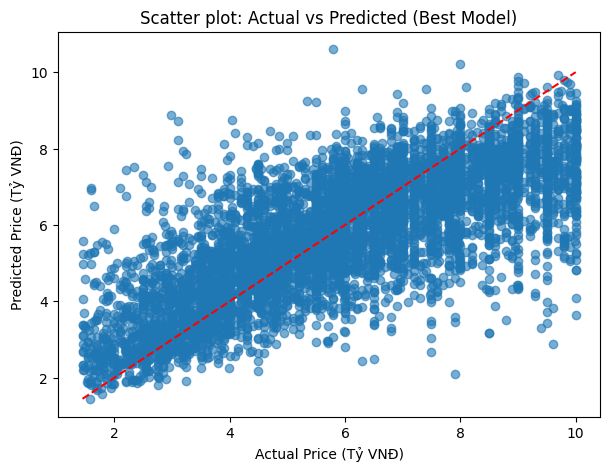

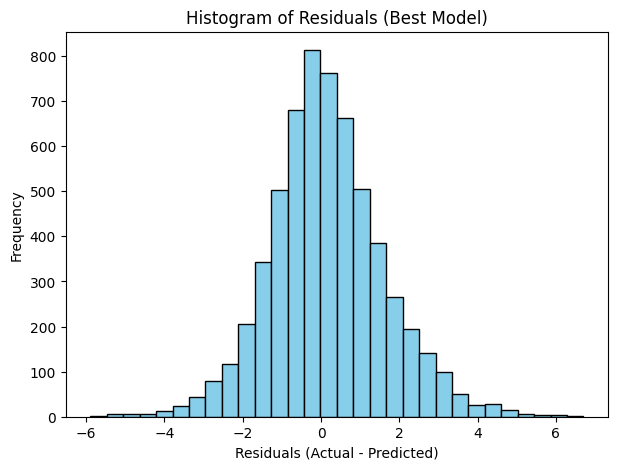

In [47]:
# 10. Visualize best model predictions and residuals
import matplotlib.pyplot as plt
best_row = results_df_sorted.iloc[0]
best_model_name = best_row['Model']
print(f"\nBest model: {best_model_name}")
best_model, best_params = models[best_model_name]
X_train_dense = X_train_processed.toarray() if hasattr(X_train_processed, 'toarray') else X_train_processed
X_test_dense = X_test_processed.toarray() if hasattr(X_test_processed, 'toarray') else X_test_processed
if best_params and len(best_params) > 0:
    search = GridSearchCV(best_model, best_params, cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1)
    search.fit(X_train_dense, y_train)
    best_model_fitted = search.best_estimator_
else:
    best_model.fit(X_train_dense, y_train)
    best_model_fitted = best_model
y_pred_log = best_model_fitted.predict(X_test_dense)
y_pred = np.expm1(y_pred_log)
y_true = np.expm1(y_test)
residuals = y_true - y_pred

    
plt.figure(figsize=(7,5))
plt.scatter(y_true, y_pred, alpha=0.6)
plt.xlabel('Actual Price (Tỷ VNĐ)')
plt.ylabel('Predicted Price (Tỷ VNĐ)')
plt.title('Scatter plot: Actual vs Predicted (Best Model)')
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
plt.show()



plt.figure(figsize=(7,5))
plt.hist(residuals, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals (Best Model)')
plt.show()

In [51]:
import matplotlib.pyplot as plt

import seaborn as sns 
# # i want to print top 5 price by city
# top_5_cities = df.groupby('City')['Price'].mean().nlargest(5)
# plt.bar(df['City'], top_5_cities.values)
# plt.xlabel('City')
# plt.ylabel('Average Price')
# plt.title('Top 5 Cities by Average House Price')
# plt.show()


plt.figure(figsize=(15,8))

ax = sns.barplot(
    data = df['Price'], 
    x= 'City',
    y = 'Price',
    hue='City'
)

for containers in ax.containers: 
    ax.bar_label(containers,fmt='%.2f')

plt.ylim(0,4.0)
plt.show()

ModuleNotFoundError: No module named 'seaborn'

### bước tiếp theo : cải thiện các model
### thêm các model có trong pd
### vẽ đầy đủ các model